<a href="https://colab.research.google.com/github/rat-nick/ml-lab/blob/main/Gradijentni_spust_u_linearnoj_regresiji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

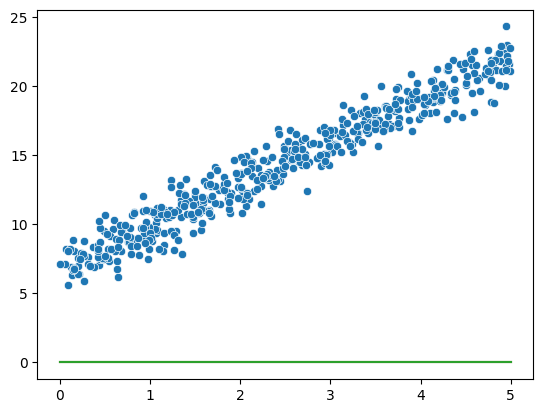

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generisanje skupa podataka
n_slucajeva = 500
X = 5 * np.random.rand(n_slucajeva)
y = 7 + 3 * X + np.random.randn(n_slucajeva)

gd_model = np.zeros(2) # model koji se obucava gradijentnim spustom
sgd_model = np.zeros(2) * 3 # model koji se obucava stohastickim gradijentnim spustom
mbgd_model = np.zeros(2) * 3 # model koji se obucava mini-batch gradijentnim spustom

space = np.linspace(0,5)

gd_y = gd_model[0] + gd_model[1] * space
sgd_y = sgd_model[0] + sgd_model[1] * space
mbgd_y = mbgd_model[0] + mbgd_model[1] * space

# prikaz podataka
sns.scatterplot(x=X, y=y)

# prikaz modela
sns.lineplot(x=space, y=gd_y)
sns.lineplot(x=space, y=sgd_y)
sns.lineplot(x=space, y=mbgd_y)
plt.show()

# Definicija funkcije koja izvrsava gradijentni spust

In [2]:
import random
from sklearn.metrics import mean_squared_error
def gradient_descent(model, X, y, epoch, batch_size, losses, lr):
  X = np.array(X)
  y = np.array(y)
  for i in range(0, len(X), batch_size):
    # uzimamo mini-batch-eve
    x_batch = X[i:i+batch_size]
    y_batch = y[i:i+batch_size]

    # racunamo predikciju i gresku modela
    y_pred = model[0] + model[1] * x_batch
    mse = mean_squared_error(y_batch, y_pred)

    # logujemo gresku modela
    losses[len(losses)+1] = mse

    # racunamo gradjent na mini-batch-u
    grad0 = -2 * np.mean(y_batch - y_pred)
    grad1 = -2 * np.mean(x_batch * (y_batch - y_pred))

    # primenjujemo gradijent na model
    model[0] -= lr * grad0
    model[1] -= lr * grad1

  # racunamo gresku modela na celom skupu
  y_pred = model[0] + model[1] * X
  return mean_squared_error(y, y_pred)



# Podesavanje hiperparametara

In [3]:
# Hiperparametri:
epohe = 50
eta = 0.01

# Mesanje podataka

In [4]:
data = list(zip(X, y))
random.shuffle(data)
X, y = zip(*data)
X = np.array(X)
y = np.array(y)

## Obucavanje GD-om

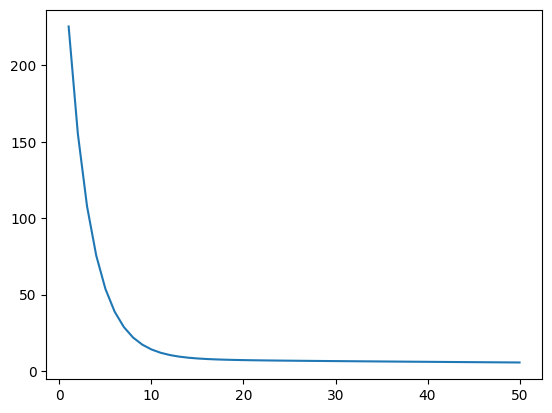

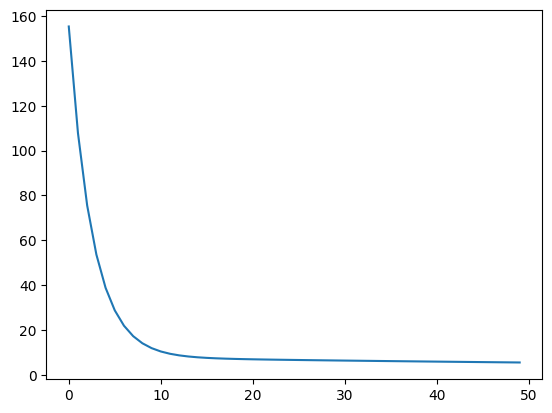

Best MSE: 5.565346535016673


In [5]:
losses = {}
epoch_losses = {}

batch_size = len(X) # zbog ovoga je GD

for epoch in range(epohe):
  loss = gradient_descent(gd_model, X, y, epoch, batch_size=batch_size, losses=losses, lr=eta)
  epoch_losses[epoch] = loss
sns.lineplot(x=losses.keys(), y=losses.values())
plt.show()
sns.lineplot(x=epoch_losses.keys(), y=epoch_losses.values())
plt.show()
print(f"Best MSE: {min(epoch_losses.values())}")

# Obucavanje SGD-om

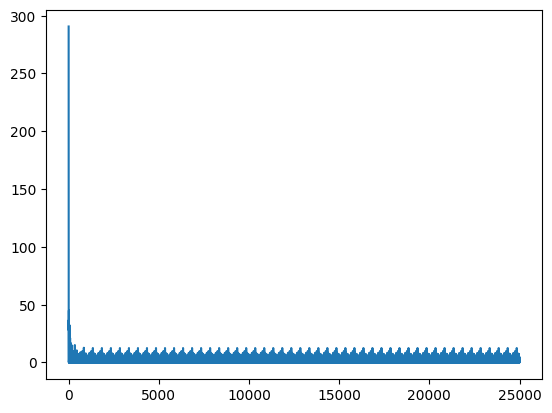

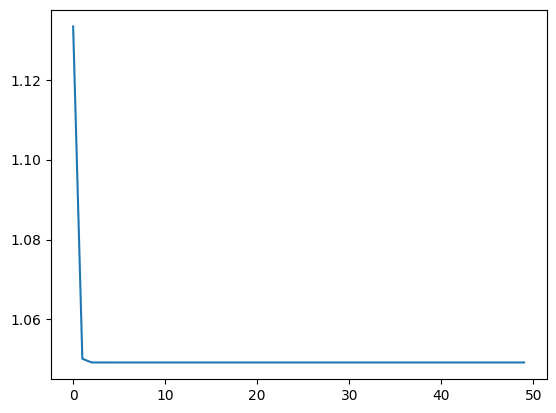

Best MSE: 1.049236137475538


In [6]:
losses = {}
epoch_losses = {}

batch_size = 1 # zbog ovoga je SGD
import random
for epoch in range(epohe):
  loss = gradient_descent(sgd_model, X, y, epoch, batch_size=batch_size, losses=losses, lr=eta)
  epoch_losses[epoch] = loss
sns.lineplot(x=losses.keys(), y=losses.values())
plt.show()
sns.lineplot(x=epoch_losses.keys(), y=epoch_losses.values())
plt.show()
print(f"Best MSE: {min(epoch_losses.values())}")

# Obucavanje MBGD-om

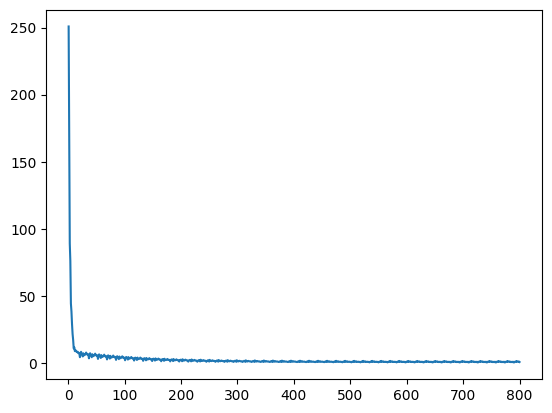

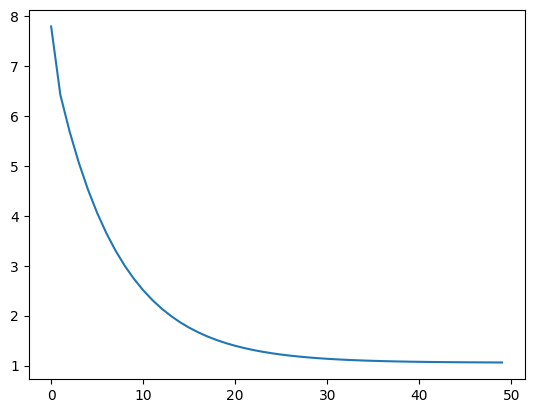

Best MSE: 1.0628163142312215


In [7]:
losses = {}
epoch_losses = {}

batch_size = 32 # zbog ovoga je MBGD
import random
for epoch in range(epohe):
  loss = gradient_descent(mbgd_model, X, y, epoch, batch_size=batch_size, losses=losses, lr=eta)
  epoch_losses[epoch] = loss

sns.lineplot(x=losses.keys(), y=losses.values())
plt.show()
sns.lineplot(x=epoch_losses.keys(), y=epoch_losses.values())
plt.show()
print(f"Best MSE: {min(epoch_losses.values())}")

# Potpuno ispravan postupak treniranja

## Trening, test i validacioni skupovi

In [8]:
from sklearn.model_selection import train_test_split

data = list(zip(X, y))
train, test = train_test_split(data, test_size=0.2, shuffle=True)
valid, test = train_test_split(test, test_size=0.5, shuffle=True)

print(len(train), len(valid), len(test))
print(valid)

400 50 50
[(0.3372124512497693, 7.021266748239837), (0.31167208207580066, 7.65521630153227), (4.01646580426193, 17.939137445410356), (1.974905992249233, 13.355185396936214), (4.214988536365277, 19.403021428234894), (3.0153265395432154, 15.232454350355118), (3.6910952882196835, 17.14294625199893), (2.4426052875187816, 13.150816253149985), (2.5703784332046675, 14.703714320106466), (3.8480534674591302, 19.67799556775273), (0.8987274360389108, 9.767116346895802), (1.070787989531223, 9.393766962727053), (2.5844505641766364, 14.103176659458272), (0.7810669541493725, 9.711763706115773), (0.8535249128915179, 8.418593175653115), (3.8886328765776055, 19.31067041281674), (0.9260974254150989, 10.947879892320588), (4.94420722635358, 21.147017029652027), (4.940802751253192, 20.008883204510546), (1.4791839336072876, 9.362721741436486), (4.223401799468352, 19.013961064878973), (1.8211150476670106, 12.9274191890518), (2.686571648788923, 14.329690118845999), (0.7970171514068636, 10.662073672029885), (1.

## Prebacivanje skupova u ispravan format

In [9]:
trainX, trainY = zip(*train)
trainX = np.array(list(trainX))
trainY = np.array(list(trainY))

testX, testY = zip(*test)
testX = np.array(list(testX))
testY = np.array(list(testY))

validX, validY = zip(*valid)
validX = np.array(list(validX))
validY = np.array(list(validY))

print(validX)

[0.33721245 0.31167208 4.0164658  1.97490599 4.21498854 3.01532654
 3.69109529 2.44260529 2.57037843 3.84805347 0.89872744 1.07078799
 2.58445056 0.78106695 0.85352491 3.88863288 0.92609743 4.94420723
 4.94080275 1.47918393 4.2234018  1.82111505 2.68657165 0.79701715
 1.58122796 3.18896183 3.86842922 4.7522353  0.7697049  1.05539748
 0.93782537 4.23501281 2.12524458 1.07567792 2.42335656 1.81310311
 2.25455518 1.88897933 1.26034382 1.22952802 3.30772597 3.1138405
 1.26135132 2.64574342 4.59535231 0.77594296 2.64744265 4.86392411
 1.88106865 3.48225261]


## Definisanje hiperparametara

In [10]:
max_epochs = 10000
patience = 5
tolerance = 1e-5
eta = 0.001
batch_size=32

## Definicija funkcije za racunanje gubitka modela na datim podacima

In [11]:
def model_loss(model, X, y):
  y_pred = model[0] + model[1] * X
  return mean_squared_error(y, y_pred)

## Obucavanje MBGD-om jer je on najefikasniji

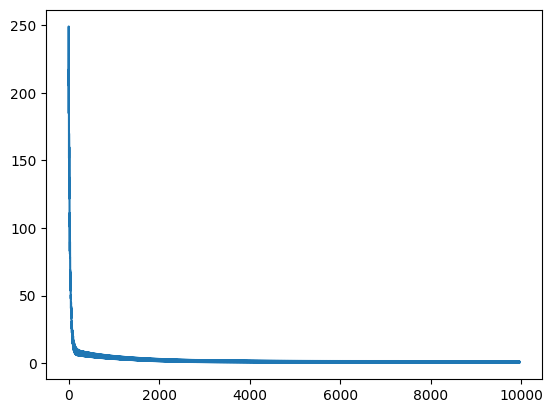

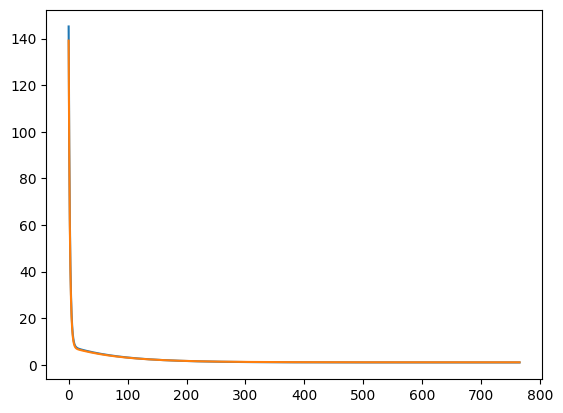

Best validation MSE: 1.1191781199822215
Best train MSE: 1.0426810640737576
Test MSE: 1.026812661176827


In [12]:
losses = {}
train_losses = {}
valid_losses = {}
best_loss = float("inf")
model = np.zeros(2)

count = 0
for epoch in range(max_epochs):
  train_loss = gradient_descent(model, trainX, trainY, epoch, batch_size=batch_size, losses=losses, lr=eta)
  train_losses[epoch] = train_loss
  valid_loss = model_loss(model, validX, validY)
  valid_losses[epoch] = valid_loss

  # provera za rano zaustavljanje
  if valid_loss >= best_loss - tolerance:
    count += 1
  else:
    count = 0
    best_loss = valid_loss

  if count == patience:
    break

sns.lineplot(x=losses.keys(), y=losses.values())
plt.show()
sns.lineplot(data=train_losses,x=train_losses.keys(), y=train_losses.values(), legend="auto")
sns.lineplot(data=valid_losses,x=valid_losses.keys(), y=valid_losses.values(), legend="auto")
plt.show()
print(f"Best validation MSE: {min(valid_losses.values())}")
print(f"Best train MSE: {min(train_losses.values())}")

test_loss = model_loss(model, testX, testY)
print(f"Test MSE: {test_loss}")